# **주제**  
### : 신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 

# **배경 및 대회 설명**
### - 신용카드사는 신용카드 신청자가 제출한 개인정보와 데이터를 활용해 신용 점수를 산정  
### - 신용카드사는 이 신용 점수를 활용해 신청자의 향후 채무 불이행과 신용카드 대금 연체 가능성을 예측  
### - 목표 : 신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측

---

# **1. 변수 설명**

- index<br>
- gender: 성별<br>
- car: 차량 소유 여부<br>
- reality: 부동산 소유 여부<br>
- child_num: 자녀 수<br>
- income_total: 연간 소득<br>
- income_type: 소득 분류<br>
	['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']<br>
- edu_type: 교육 수준<br>
	['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부<br>
	['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']<br>
- house_type: 생활 방식<br>
	['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']<br>
- DAYS_BIRTH: 출생일<br>
	=> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미<br>
- DAYS_EMPLOYED: 업무 시작일<br>
	=> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미<br>
	=> 양수 값은 고용되지 않은 상태를 의미함<br>
- FLAG_MOBIL: 핸드폰 소유 여부<br>
- work_phone: 업무용 전화 소유 여부<br>
- phone: 전화 소유 여부<br>
- email: 이메일 소유 여부<br>
- occyp_type: 직업 유형<br>
	[nan, 'Laborers', 'Managers', 'Sales staff','High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',<br>
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff','Private service staff', 'Cooking staff', 'Secretaries',<br>
       'HR staff', 'IT staff', 'Low-skill Laborers','Waiters/barmen staff']<br>											
- family_size: 가족 규모<br>
- begin_month: 신용카드 발급 월<br>
	=> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미<br>
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도<br>
	=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

### - FLAG_MOBIL / OCCYP_TYPE DROP

---

In [1]:
import pandas as pd
import numpy as np

In [207]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
submission = pd.read_csv('../Data/sample_submission.csv')
subtrain = train

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [108]:
train = train.drop(['occyp_type'], axis=1)
test = test.drop(['occyp_type'], axis=1)
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,2.0,-26.0,2.0


In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

---

연속형 변수 -> 범주형 변수로 변환

### 1. income_total 

In [110]:
# MinMaxScaler() 사용해보기


In [111]:
train['income_total'] = train['income_total'].astype(object)
test['income_total'] = test['income_total'].astype(object)
train['income_total'] = train['income_total']/10000 
test['income_total'] = test['income_total']/10000
##############################################################3
print(train['income_total'].value_counts(bins=10,sort=False))
print(test['income_total'].value_counts(bins=10,sort=False))

#train['income_total'].plot(kind='hist',bins=50,density=True)

(2.544, 18.18]      16212
(18.18, 33.66]       8330
(33.66, 49.14]       1530
(49.14, 64.62]        206
(64.62, 80.1]         121
(80.1, 95.58]          44
(95.58, 111.06]         3
(111.06, 126.54]        2
(126.54, 142.02]        4
(142.02, 157.5]         5
Name: income_total, dtype: int64
(2.544, 18.18]      6248
(18.18, 33.66]      3050
(33.66, 49.14]       569
(49.14, 64.62]        68
(64.62, 80.1]         44
(80.1, 95.58]         14
(95.58, 111.06]        1
(111.06, 126.54]       1
(126.54, 142.02]       2
(142.02, 157.5]        3
Name: income_total, dtype: int64


In [112]:
type(train['income_total'])
num_train = train['income_total']

In [113]:
Q1 = num_train.quantile(0.20)
Q2 = num_train.quantile(0.40)
Q3 = num_train.quantile(0.60)
Q4 = num_train.quantile(0.80)
Q5 = num_train.quantile(1)
print(Q1,Q2,Q3,Q4,Q5)


11.25 14.399999999999999 18.0 24.75 157.5


In [114]:
num_test = test['income_total']
Q1 = num_test.quantile(0.20)
Q2 = num_test.quantile(0.40)
Q3 = num_test.quantile(0.60)
Q4 = num_test.quantile(0.80)
Q5 = num_test.quantile(1)
print(Q1,Q2,Q3,Q4,Q5)

11.25 13.95 18.0 24.3 157.5


In [115]:
train['income_total'].value_counts(bins=5, sort=False)
test['income_total'].value_counts(bins=5, sort=False)


(2.544, 33.66]     9298
(33.66, 64.62]      637
(64.62, 95.58]       58
(95.58, 126.54]       2
(126.54, 157.5]       5
Name: income_total, dtype: int64

In [116]:
train['income_total'] = pd.cut(train['income_total'], bins=[0,Q1,Q2,Q3,Q4,Q5], labels=['a','b','c','d','e'])
test['income_total'] = pd.cut(test['income_total'], bins=[0,Q1,Q2,Q3,Q4,Q5], labels=['a','b','c','d','e'])

bin : 동일한 길이의 bins 값으로 분할  
0~Q1 : 'a',   Q1~Q2 : 'b',   Q2~Q3 : 'c',   Q3~Q4 : 'd',   Q4~Q5 : 'e' 

In [117]:
train['income_total'].unique()
test['income_total'].unique()

['a', 'b', 'd', 'e', 'c']
Categories (5, object): ['a' < 'b' < 'c' < 'd' < 'e']

In [118]:
train['income_total']

0        d
1        e
2        e
3        d
4        c
        ..
26452    d
26453    c
26454    e
26455    c
26456    a
Name: income_total, Length: 26457, dtype: category
Categories (5, object): ['a' < 'b' < 'c' < 'd' < 'e']

In [119]:
train['income_total'].value_counts()

a    6191
c    5643
e    5463
d    4782
b    4378
Name: income_total, dtype: int64

In [120]:
test['income_total']

0       a
1       b
2       a
3       a
4       d
       ..
9995    d
9996    d
9997    e
9998    c
9999    e
Name: income_total, Length: 10000, dtype: category
Categories (5, object): ['a' < 'b' < 'c' < 'd' < 'e']

### 2. DAYS_BIRTH

In [121]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])   #음수값 처리
test['DAYS_BIRTH'] = abs(test['DAYS_BIRTH'])   #음수값 처리

In [122]:
train['DAYS_BIRTH']
test['DAYS_BIRTH']

0       21990
1       18964
2       15887
3       19270
4       17822
        ...  
9995    18593
9996    10886
9997    21016
9998    16541
9999     9154
Name: DAYS_BIRTH, Length: 10000, dtype: int64

(7687.552, 11194.4]    4147
(11194.4, 14683.8]     7246
(14683.8, 18173.2]     6438
(18173.2, 21662.6]     5438
(21662.6, 25152.0]     3188
Name: DAYS_BIRTH, dtype: int64
(7471.336, 11021.6]    1374
(11021.6, 14554.2]     2752
(14554.2, 18086.8]     2486
(18086.8, 21619.4]     2126
(21619.4, 25152.0]     1262
Name: DAYS_BIRTH, dtype: int64


<AxesSubplot:ylabel='Frequency'>

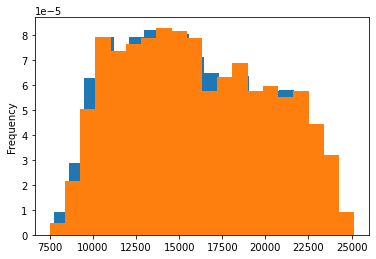

In [123]:
print(train['DAYS_BIRTH'].value_counts(bins=5,sort=False))
train['DAYS_BIRTH'].plot(kind='hist',bins=20,density=True)

print(test['DAYS_BIRTH'].value_counts(bins=5,sort=False))
test['DAYS_BIRTH'].plot(kind='hist',bins=20,density=True)

In [124]:
min(train['DAYS_BIRTH'])

7705

In [125]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x2020b9883d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2020b988af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2020b988040>],
 'medians': [<matplotlib.lines.Line2D at 0x2020b97d250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2020b97d5e0>],
 'means': []}

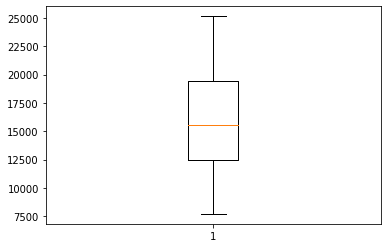

In [126]:
plt.boxplot(train['DAYS_BIRTH'])

In [127]:
num = train['DAYS_BIRTH']
Q1 = num.quantile(0.20)
Q2 = num.quantile(0.40)
Q3 = num.quantile(0.60)
Q4 = num.quantile(0.80)
Q5 = num.quantile(1)
print(Q1,Q2,Q3,Q4,Q5)

num = test['DAYS_BIRTH']
Q1 = num.quantile(0.20)
Q2 = num.quantile(0.40)
Q3 = num.quantile(0.60)
Q4 = num.quantile(0.80)
Q5 = num.quantile(1)
print(Q1,Q2,Q3,Q4,Q5)

11814.0 14329.400000000001 17001.0 20283.800000000003 25152.0
11864.0 14419.0 17095.0 20311.800000000003 25152.0


In [128]:
train['DAYS_BIRTH'] = pd.cut(train['DAYS_BIRTH'], bins=[0,Q1,Q2,Q3,Q4,Q5], labels=['a','b','c','d','e'])
test['DAYS_BIRTH'] = pd.cut(test['DAYS_BIRTH'], bins=[0,Q1,Q2,Q3,Q4,Q5], labels=['a','b','c','d','e'])

In [129]:
train['DAYS_BIRTH'].value_counts()
test['DAYS_BIRTH'].value_counts()

a    2002
b    2001
e    2000
d    1999
c    1998
Name: DAYS_BIRTH, dtype: int64

3. FLAG_MOBIL => 핸드폰 소유 1, 핸드폰 무소유 0 -> DROP할거야 왜냐면 전부다 가지고 있으니까

In [130]:
train = train.drop(['FLAG_MOBIL'], axis =1)
test = test.drop(['FLAG_MOBIL'], axis =1)

4. work_phone : 업무용 전화 소유 1, 업무용 전화 무소유 0

In [131]:
train['work_phone'] = train['work_phone'].replace([1,0],['Y','N'])
test['work_phone'] = test['work_phone'].replace([1,0],['Y','N'])

In [132]:
train['work_phone']

0        N
1        N
2        N
3        N
4        N
        ..
26452    N
26453    N
26454    N
26455    N
26456    N
Name: work_phone, Length: 26457, dtype: object

5. phone : 전화 소유 1, 전화 무소유 0

In [133]:
train['phone'] = train['phone'].replace([1,0], ['Y','N'])
test['phone'] = test['phone'].replace([1,0], ['Y','N'])

6. email : 이메일 소유 1, 이메일 무소유 0

In [134]:
train['email'] = train['email'].replace([1,0], ['Y','N'])
test['email'] = test['email'].replace([1,0], ['Y','N'])
train['email']

0        N
1        Y
2        N
3        N
4        N
        ..
26452    N
26453    N
26454    N
26455    N
26456    N
Name: email, Length: 26457, dtype: object

7. family_size

{'whiskers': [<matplotlib.lines.Line2D at 0x2020b9290a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2020b9297c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2020b8e4cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2020b929ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2020b9332b0>],
 'means': []}

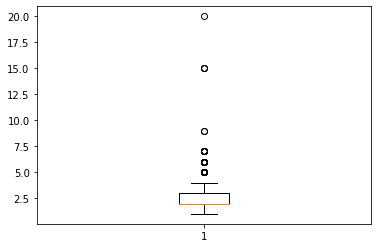

In [135]:

plt.boxplot(train['family_size'])

In [136]:
num = train['family_size']
Q3 = num.quantile(0.75)
Q1 = num.quantile(0.25)
median = num.quantile(0.50)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR           #최소값 Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5 * IQR                #최댓값 Q3 + 1.5*IQR

#outlier = 최댓값 초과 또는 최솟값 미만

In [137]:
print(lower_whisker, upper_whisker)

0.5 4.5


In [138]:
max(train['family_size'])

20.0

In [139]:
train.loc[(train['family_size']> upper_whisker) | (train['family_size'] < lower_whisker), 'family_size'] = upper_whisker

In [140]:
""" num = train['family_size']
q1 = num.quantile(0.20)
q2 = num.quantile(0.40)
q3 = num.quantile(0.60)
q4 = num.quantile(0.80)
q5 = num.quantile(1)
print(q1,q2,q3,q4,q5) """

" num = train['family_size']\nq1 = num.quantile(0.20)\nq2 = num.quantile(0.40)\nq3 = num.quantile(0.60)\nq4 = num.quantile(0.80)\nq5 = num.quantile(1)\nprint(q1,q2,q3,q4,q5) "

In [141]:
min(train['family_size'])

1.0

In [142]:
train['family_size'] = pd.cut(train['family_size'], bins=4, labels=['a','b','c','d'])
test['family_size'] = pd.cut(test['family_size'], bins=4, labels=['a','b','c','d'])

In [143]:
train['family_size'].value_counts()

b    14106
a     5109
c     4632
d     2610
Name: family_size, dtype: int64

In [144]:
test['family_size'].value_counts()

a    7235
b    2635
c     106
d      24
Name: family_size, dtype: int64

In [145]:
train['family_size']

0        b
1        c
2        b
3        b
4        b
        ..
26452    d
26453    b
26454    b
26455    a
26456    b
Name: family_size, Length: 26457, dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

8. begin_month : 신용카드 발급개월 수 역수

In [146]:
train['begin_month'] = abs(train['begin_month'])
test['begin_month'] = abs(test['begin_month'])

<AxesSubplot:ylabel='Frequency'>

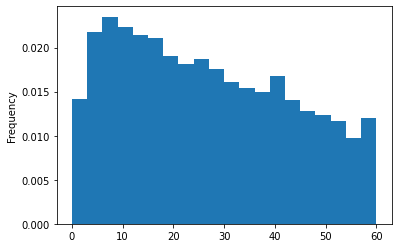

In [147]:
train['begin_month'].plot(kind='hist',bins = 20,density=True)

In [148]:
train['begin_month'] = train['begin_month']/12
test['begin_month'] = test['begin_month']/12

In [149]:
train['begin_month']

0        0.500000
1        0.416667
2        1.833333
3        3.083333
4        2.166667
           ...   
26452    0.166667
26453    3.916667
26454    2.083333
26455    4.916667
26456    0.750000
Name: begin_month, Length: 26457, dtype: float64

<AxesSubplot:ylabel='Frequency'>

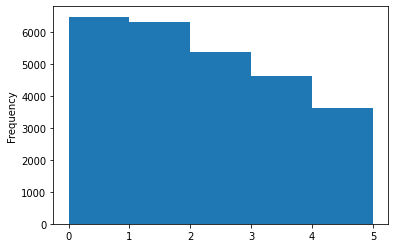

In [150]:
train['begin_month'].plot(kind='hist',bins = 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x2020d4dd3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2020d4ddac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2020d4d0fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2020d4e6220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2020d4e65b0>],
 'means': []}

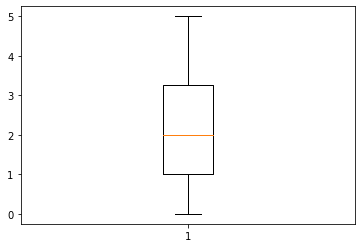

In [151]:
plt.boxplot(train['begin_month'])

In [152]:
train['begin_month'] = pd.cut(train['begin_month'], bins=5, labels=['a','b','c','d','e'])
test['begin_month'] = pd.cut(test['begin_month'], bins=5, labels=['a','b','c','d','e'])

In [153]:
train['begin_month'].value_counts()

a    7049
b    6270
c    5250
d    4594
e    3294
Name: begin_month, dtype: int64

In [154]:
test['begin_month'].value_counts()

a    2541
b    2450
c    2059
d    1714
e    1236
Name: begin_month, dtype: int64

In [155]:
train['begin_month']

0        a
1        a
2        b
3        d
4        c
        ..
26452    a
26453    d
26454    c
26455    e
26456    a
Name: begin_month, Length: 26457, dtype: category
Categories (5, object): ['a' < 'b' < 'c' < 'd' < 'e']

9. child_num 

In [156]:
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [157]:
train.loc[train['child_num']>=1,'child_num'] = 1
test.loc[test['child_num']>=1,'child_num'] = 1

In [158]:
train['child_num'].value_counts()

0    18340
1     8117
Name: child_num, dtype: int64

In [159]:
train['child_num'] = train['child_num'].replace([1,0],['Y','N'])
test['child_num'] = test['child_num'].replace([1,0],['Y','N'])

In [160]:
train['child_num']

0        N
1        Y
2        N
3        N
4        N
        ..
26452    Y
26453    Y
26454    N
26455    N
26456    N
Name: child_num, Length: 26457, dtype: object

In [161]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          10000 non-null  int64   
 1   gender         10000 non-null  object  
 2   car            10000 non-null  object  
 3   reality        10000 non-null  object  
 4   child_num      10000 non-null  object  
 5   income_total   10000 non-null  category
 6   income_type    10000 non-null  object  
 7   edu_type       10000 non-null  object  
 8   family_type    10000 non-null  object  
 9   house_type     10000 non-null  object  
 10  DAYS_BIRTH     10000 non-null  category
 11  DAYS_EMPLOYED  10000 non-null  int64   
 12  work_phone     10000 non-null  object  
 13  phone          10000 non-null  object  
 14  email          10000 non-null  object  
 15  family_size    10000 non-null  category
 16  begin_month    10000 non-null  category
dtypes: category(4), int64(2), object

### 10. DAYS_EMPLOYED 

In [162]:
train['DAYS_EMPLOYED'] = -train['DAYS_EMPLOYED']
test['DAYS_EMPLOYED'] = -test['DAYS_EMPLOYED']

{'whiskers': [<matplotlib.lines.Line2D at 0x2020d53ff70>,
 'caps': [<matplotlib.lines.Line2D at 0x2020d54e640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2020d53fbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x2020d54ed60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2020d55a130>],
 'means': []}

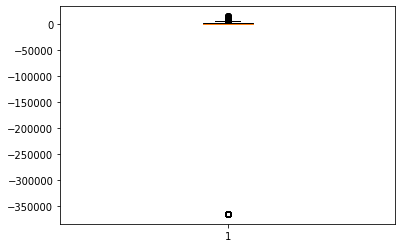

In [163]:
import matplotlib.pyplot as plt
plt.boxplot(train['DAYS_EMPLOYED'])

In [164]:
test['DAYS_EMPLOYED'].value_counts()

-365243    1697
 1678        22
 1661        21
 401         21
 2057        20
           ... 
 6359         1
 3116         1
 1623         1
 1505         1
 770          1
Name: DAYS_EMPLOYED, Length: 2665, dtype: int64

In [165]:
train.loc[train['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED']=1
test.loc[test['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED']=1      # 일 안 한 애들 다 1로 합쳐버림 (출근한지 1일차)

{'whiskers': [<matplotlib.lines.Line2D at 0x2020d5b7460>,
 'caps': [<matplotlib.lines.Line2D at 0x2020d5b7b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2020d5b70d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2020d5c22e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2020d5c2670>],
 'means': []}

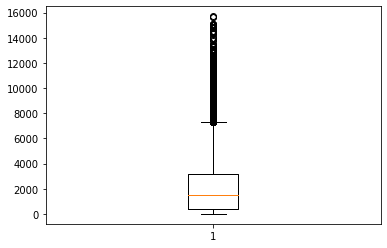

In [166]:
plt.boxplot(train['DAYS_EMPLOYED'])

In [167]:
train['DAYS_EMPLOYED'].unique()

array([4709, 1540, 4434, ..., 1620, 2960, 4973], dtype=int64)

In [168]:
train['DAYS_EMPLOYED'] = pd.cut(train['DAYS_EMPLOYED'], bins=7, labels=['a','b','c','d','e','f','g'])
test['DAYS_EMPLOYED'] = pd.cut(test['DAYS_EMPLOYED'], bins=7, labels=['a','b','c','d','e','f','g'])

In [169]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace({'e' : 'd', 'g' : 'd', 'f' : 'd'})
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace({'e' : 'd', 'g' : 'd', 'f' : 'd'})

In [170]:
train['DAYS_EMPLOYED'].value_counts()
test['DAYS_EMPLOYED'].value_counts()

a    6169
b    2420
c     819
d     592
Name: DAYS_EMPLOYED, dtype: int64

In [171]:
train['DAYS_EMPLOYED']

0        c
1        a
2        b
3        a
4        a
        ..
26452    a
26453    b
26454    a
26455    a
26456    a
Name: DAYS_EMPLOYED, Length: 26457, dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [172]:
train['DAYS_EMPLOYED'].unique()

['c', 'a', 'b', 'd']
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [173]:
train['DAYS_EMPLOYED'].value_counts()

a    16552
b     6219
c     2120
d     1566
Name: DAYS_EMPLOYED, dtype: int64

### 11. income_type

In [174]:
train['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [175]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [176]:
train['income_type'] = train['income_type'].replace({'Student' : 'Pensioner'})
test['income_type'] = test['income_type'].replace({'Student' : 'Pensioner'})

In [177]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4456
State servant            2154
Name: income_type, dtype: int64

### 12. edu_type    중등 / 고등 / 중졸 / 초졸 / 학.석.박  

In [178]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [179]:
train['edu_type'] = train['edu_type'].replace({'Academic degree' : 'Higher education'})
train['edu_type'] = train['edu_type'].replace({'Lower secondary' : 'Incomplete higher'})

test['edu_type'] = test['edu_type'].replace({'Academic degree' : 'Higher education'})
test['edu_type'] = test['edu_type'].replace({'Lower secondary' : 'Incomplete higher'})

In [180]:
train['edu_type'].value_counts()
test['edu_type'].value_counts()

Secondary / secondary special    6782
Higher education                 2711
Incomplete higher                 507
Name: edu_type, dtype: int64

### 13. house_type
House / apartment<br>     
With parents<br>            
Municipal apartment<br>  시립아파트
Rented apartment<br>  임대아파트      
Office apartment<br>  오피스텔       
Co-op apartment<br>  협동?

In [181]:
train['house_type'].unique()

array(['Municipal apartment', 'House / apartment', 'With parents',
       'Co-op apartment', 'Rented apartment', 'Office apartment'],
      dtype=object)

In [182]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [183]:
train['house_type'] = train['house_type'].replace({'Co-op apartment' : 'Office apartment'})
train['house_type'] = train['house_type'].replace({'Rented apartment' : 'Municipal apartment'})

test['house_type'] = test['house_type'].replace({'Co-op apartment' : 'Office apartment'})
test['house_type'] = test['house_type'].replace({'Rented apartment' : 'Municipal apartment'})

In [184]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment     1247
Office apartment         300
Name: house_type, dtype: int64

---

In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          26457 non-null  int64   
 1   gender         26457 non-null  object  
 2   car            26457 non-null  object  
 3   reality        26457 non-null  object  
 4   child_num      26457 non-null  object  
 5   income_total   26457 non-null  category
 6   income_type    26457 non-null  object  
 7   edu_type       26457 non-null  object  
 8   family_type    26457 non-null  object  
 9   house_type     26457 non-null  object  
 10  DAYS_BIRTH     26457 non-null  category
 11  DAYS_EMPLOYED  26457 non-null  category
 12  work_phone     26457 non-null  object  
 13  phone          26457 non-null  object  
 14  email          26457 non-null  object  
 15  family_size    26457 non-null  category
 16  begin_month    26457 non-null  category
 17  credit         26457 non-null  

In [186]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,F,N,N,N,d,Commercial associate,Higher education,Married,Municipal apartment,b,c,N,N,N,b,a,1.0
1,1,F,N,Y,Y,e,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,a,a,N,N,Y,c,a,1.0
2,2,M,Y,Y,N,e,Working,Higher education,Married,House / apartment,d,b,N,Y,N,b,b,2.0
3,3,F,N,Y,N,d,Commercial associate,Secondary / secondary special,Married,House / apartment,c,a,N,Y,N,b,d,0.0
4,4,F,Y,Y,N,c,State servant,Higher education,Married,House / apartment,c,a,N,N,N,b,c,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,Y,d,State servant,Secondary / secondary special,Married,House / apartment,b,a,N,N,N,d,a,1.0
26453,26453,F,N,Y,Y,c,Working,Higher education,Separated,House / apartment,c,b,N,N,N,b,d,2.0
26454,26454,F,Y,N,N,e,Working,Secondary / secondary special,Civil marriage,With parents,a,a,N,N,N,b,c,2.0
26455,26455,M,N,Y,N,c,Working,Incomplete higher,Single / not married,House / apartment,a,a,N,N,N,a,e,2.0


In [187]:
train_x = train.drop(['index', 'credit'], axis =1)
test_x = test.drop('index', axis = 1)
train_y = train[['credit']]

In [188]:
print(train_x.shape, train_y.shape, test_x.shape)

(26457, 16) (26457, 1) (10000, 16)


In [189]:
train_x = pd.get_dummies(train_x, drop_first= True)
test_x = pd.get_dummies(test_x, drop_first= True)

#train_x 형태 확인하기 위해 dataframe형태로 변환
train_x = pd.DataFrame(train_x)
train_x

,gender_M,car_Y,reality_Y,child_num_Y,income_total_b,income_total_c,income_total_d,income_total_e,income_type_Pensioner,income_type_State servant,...,work_phone_Y,phone_Y,email_Y,family_size_b,family_size_c,family_size_d,begin_month_b,begin_month_c,begin_month_d,begin_month_e
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,1,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
26453,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
26454,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
26455,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [190]:
train_x

,gender_M,car_Y,reality_Y,child_num_Y,income_total_b,income_total_c,income_total_d,income_total_e,income_type_Pensioner,income_type_State servant,...,work_phone_Y,phone_Y,email_Y,family_size_b,family_size_c,family_size_d,begin_month_b,begin_month_c,begin_month_d,begin_month_e
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,1,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
26453,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
26454,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
26455,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [191]:
train_x.columns

Index(['gender_M', 'car_Y', 'reality_Y', 'child_num_Y', 'income_total_b',
       'income_total_c', 'income_total_d', 'income_total_e',
       'income_type_Pensioner', 'income_type_State servant',
       'income_type_Working', 'edu_type_Incomplete higher',
       'edu_type_Secondary / secondary special', 'family_type_Married',
       'family_type_Separated', 'family_type_Single / not married',
       'family_type_Widow', 'house_type_Municipal apartment',
       'house_type_Office apartment', 'house_type_With parents',
       'DAYS_BIRTH_b', 'DAYS_BIRTH_c', 'DAYS_BIRTH_d', 'DAYS_BIRTH_e',
       'DAYS_EMPLOYED_b', 'DAYS_EMPLOYED_c', 'DAYS_EMPLOYED_d', 'work_phone_Y',
       'phone_Y', 'email_Y', 'family_size_b', 'family_size_c', 'family_size_d',
       'begin_month_b', 'begin_month_c', 'begin_month_d', 'begin_month_e'],
      dtype='object')

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
#catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)



#param 조금 수정함 -> 오버피팅 개심함.. 왜지?ㅠㅠ
""" cat_clf=CatBoostClassifier(n_estimators=3000, max_depth=8, random_seed=1042, learning_rate=0.04, bootstrap_type ='Bernoulli')
cat_clf.fit(X_train, y_train,early_stopping_rounds=50,silent = True) """
cat_clf=CatBoostClassifier()
cat_clf.fit(X_train, y_train)



#y_pred=cat_clf.predict_proba(X_val)
#proba : 확률로 만듬

y_pred=cat_clf.predict(X_val)

print(f"cat_log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")


Train set: 
(19842, 37)
(19842, 1)
Validation set: 
(6615, 37)
(6615, 1)
Learning rate set to 0.092151
0:	learn: 1.0580557	total: 185ms	remaining: 3m 4s
1:	learn: 1.0267548	total: 197ms	remaining: 1m 38s
2:	learn: 1.0010360	total: 208ms	remaining: 1m 9s
3:	learn: 0.9783290	total: 222ms	remaining: 55.2s
4:	learn: 0.9608264	total: 236ms	remaining: 47s
5:	learn: 0.9465417	total: 244ms	remaining: 40.4s
6:	learn: 0.9344336	total: 258ms	remaining: 36.6s
7:	learn: 0.9241507	total: 268ms	remaining: 33.3s
8:	learn: 0.9156899	total: 290ms	remaining: 31.9s
9:	learn: 0.9083472	total: 306ms	remaining: 30.3s
10:	learn: 0.9020873	total: 324ms	remaining: 29.1s
11:	learn: 0.8946057	total: 345ms	remaining: 28.4s
12:	learn: 0.8899751	total: 359ms	remaining: 27.2s
13:	learn: 0.8859423	total: 372ms	remaining: 26.2s
14:	learn: 0.8809568	total: 385ms	remaining: 25.3s
15:	learn: 0.8781804	total: 398ms	remaining: 24.5s
16:	learn: 0.8756811	total: 410ms	remaining: 23.7s
17:	learn: 0.8731552	total: 421ms	remaini

C:\Users\sally\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


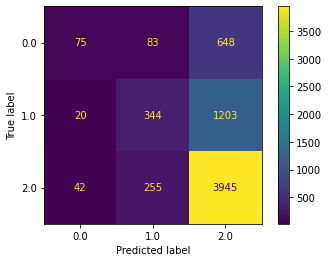

In [197]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cat_clf, X_val, y_val)  
plt.show()

<BarContainer object of 37 artists>

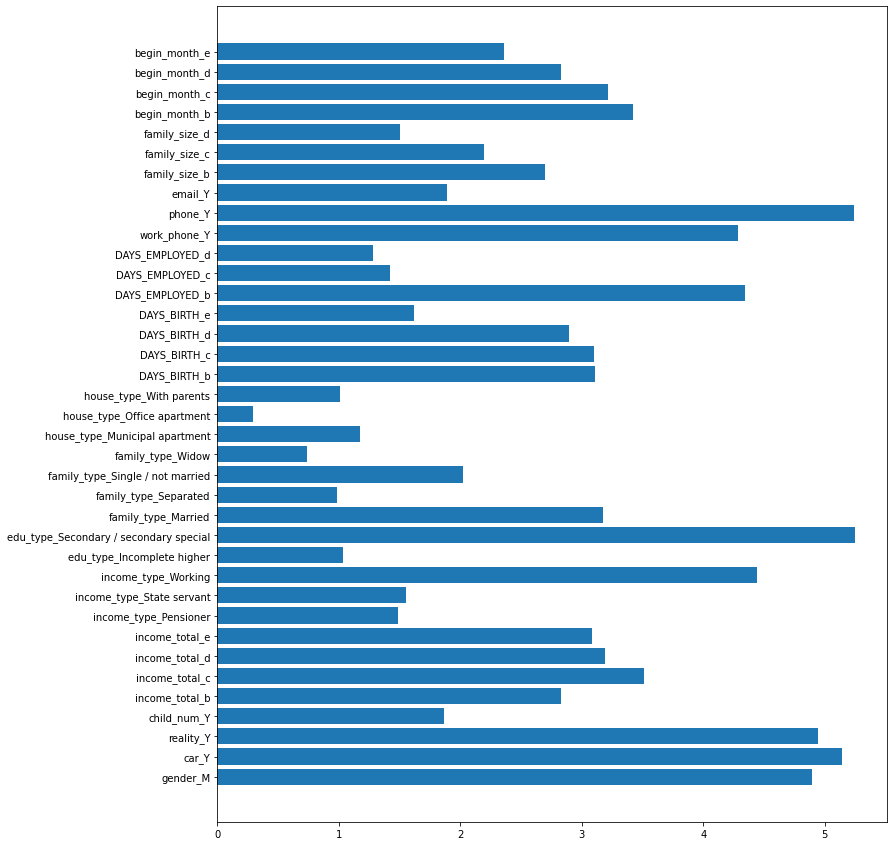

In [369]:
import matplotlib.pyplot as plt

cat_clf.get_feature_importance()
plt.figure(figsize=(12,15))
plt.barh(X_train.columns, cat_clf.get_feature_importance())

In [198]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train, silent = True)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(cat_clf)

FOLD 0 : logloss:0.8266504238675215
FOLD 1 : logloss:0.8252799754607403
FOLD 2 : logloss:0.816580951376987
FOLD 3 : logloss:0.8154777192988032
FOLD 4 : logloss:0.8244649171396725
Mean:0.8216907974287448


C:\Users\sally\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


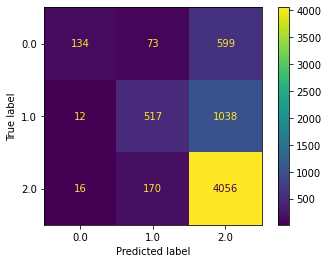

In [200]:
plot_confusion_matrix(cat_clf, X_val, y_val)  
plt.show()

In [205]:
""" from sklearn import tree
cat_clf = tree.DecisionTreeClassifier(random_state=0)
tree.plot_tree(cat_clf) """

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [202]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split
import warnings

In [ ]:
"""  export_graphviz(cat_clf, out_file="tree.dot", class_names=iris_data.target_names, 
               feature_names = iris_data.feature_names, impurity=True, filled=True)"""

In [371]:
submission.loc[:,1:] = my_submission

C:\Users\sally\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [372]:
submission.to_csv('../Data/Catboost_HJ4.csv', index= False)